# Import necessary packages

In [ ]:
# Load the necessary packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import scipy.stats as stats  
from datetime import datetime
from google.colab import drive

from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import pickle

drive.mount('/content/drive')
%matplotlib inline

Mounted at /content/drive


# PART A

DOMAIN: Telecom

**• CONTEXT:** A telecom company wants to use their historical customer data to predict behaviour to retain customers. You can analyse all
relevant customer data and develop focused customer retention programs.

• **DATA DESCRIPTION:** Each row represents a customer, each column contains customer’s attributes described on the column Metadata. The
data set includes information about:

*   Customers who left within the last month – the column is called Churn
*   Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and
streaming TV and movies
*   Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
*   Demographic info about customers – gender, age range, and if they have partners and dependents

• **PROJECT OBJECTIVE:** To Build a model that will help to identify the potential customers who have a higher probability to churn. This helps the
company to understand the pinpoints and patterns of customer churn and will increase the focus on strategizing customer retention.


In [ ]:
# 1.A & B. Read CSV files as DataFrame and store them into 2 separate variables.
df1 = pd.read_csv('/content/drive/My Drive/AIML/Ensemble Techniques/Project/TelcomCustomer-Churn_1.csv')
df2 = pd.read_csv('/content/drive/My Drive/AIML/Ensemble Techniques/Project/TelcomCustomer-Churn_2.csv')

In [ ]:
print("1.B Normal csv shape = ", df1.shape)
print("1.B Type S csv shape = ", df2.shape)

1.B Normal csv shape =  (7043, 10)
1.B Type S csv shape =  (7043, 12)


In [ ]:
# 1.c Merge both the Dataframes on ‘customerID’ feature to form a single DataFrame
merged_df = pd.merge(df1, df2, on='customerID')
print("1.C Result csv shape = ", merged_df.shape)

1.C Result csv shape =  (7043, 21)


In [ ]:
merged_cols = set(merged_df.columns)
#print("Common column names:", merged_cols)

# Checking if all columns from df1 & df2 are present in the merged dF
all_columns_present = all(column in merged_df.columns for column in df1.columns) and all(column in merged_df.columns for column in df2.columns)

print("1.D is all column of df1 & df2 present in merged_df = ", all_columns_present)

1.D is all column of df1 & df2 present in merged_df =  True


**Data Cleaning & Analysis:**

In [ ]:
print("Data Type = \n", merged_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
#2. A
merged_df['TotalCharges'] = pd.to_numeric(merged_df['TotalCharges'], errors='coerce')
merged_df[merged_df['TotalCharges'].isna()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [ ]:
# calculate the mean of the TotalCharges column
mean_total_charges = merged_df['TotalCharges'].mean()

# replace NaN values with the mean value
merged_df['TotalCharges'] = merged_df['TotalCharges'].fillna(mean_total_charges)
print("Data Type = \n", merged_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
for feature in merged_df.columns: # Loop through all columns in the dataframe
    if merged_df[feature].dtype == 'object': # Only apply for columns with categorical strings
        merged_df[feature] = pd.Categorical(merged_df[feature])# Replace strings with an integer

merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7043 non-null   category
 1   gender            7043 non-null   category
 2   SeniorCitizen     7043 non-null   int64   
 3   Partner           7043 non-null   category
 4   Dependents        7043 non-null   category
 5   tenure            7043 non-null   int64   
 6   PhoneService      7043 non-null   category
 7   MultipleLines     7043 non-null   category
 8   InternetService   7043 non-null   category
 9   OnlineSecurity    7043 non-null   category
 10  OnlineBackup      7043 non-null   category
 11  DeviceProtection  7043 non-null   category
 12  TechSupport       7043 non-null   category
 13  StreamingTV       7043 non-null   category
 14  StreamingMovies   7043 non-null   category
 15  Contract          7043 non-null   category
 16  PaperlessBilling  7043 n

In [ ]:
def create_piecharts(df):
    df = df.drop(columns=['customerID'])
    categorical_features = df.select_dtypes(include=['category']).columns
    
    for feature in categorical_features:
        feature_counts = df[feature].value_counts()
        feature_counts.plot(kind='pie', autopct='%1.1f%%', figsize=(6, 6))
        plt.title(feature)
        plt.show()

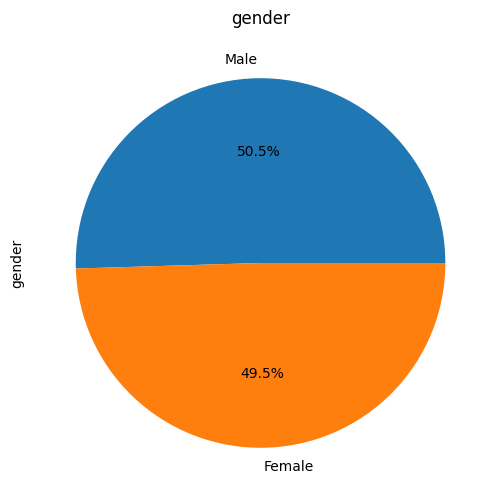

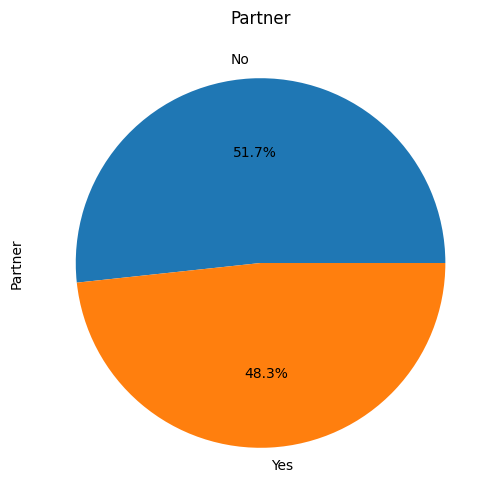

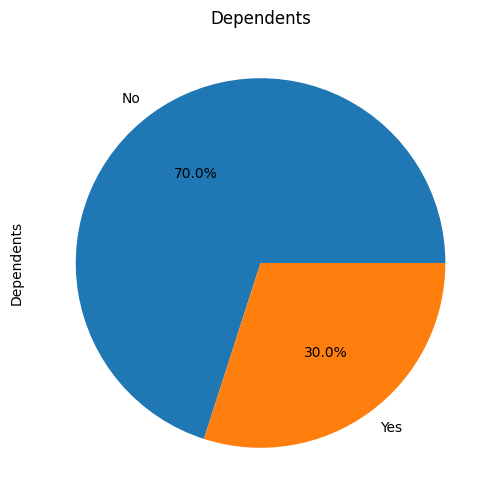

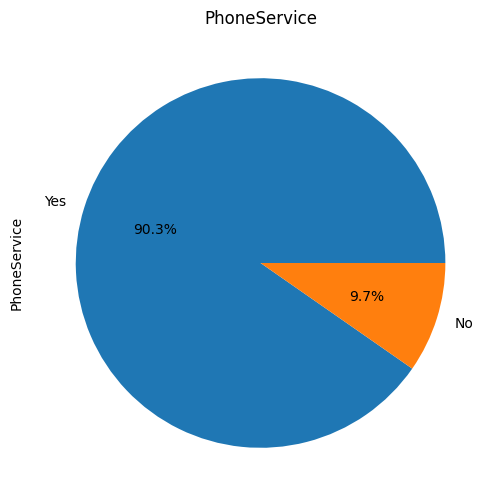

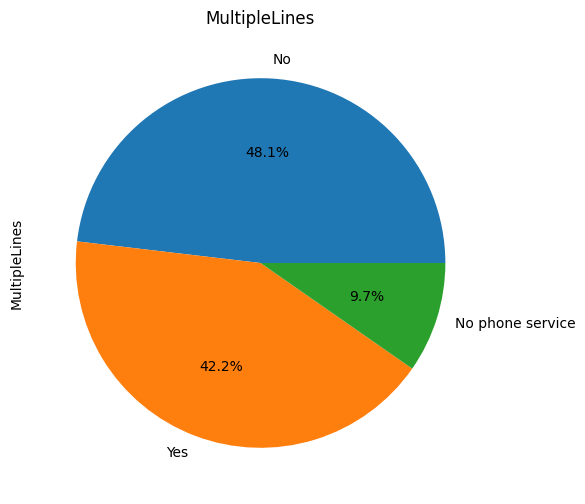

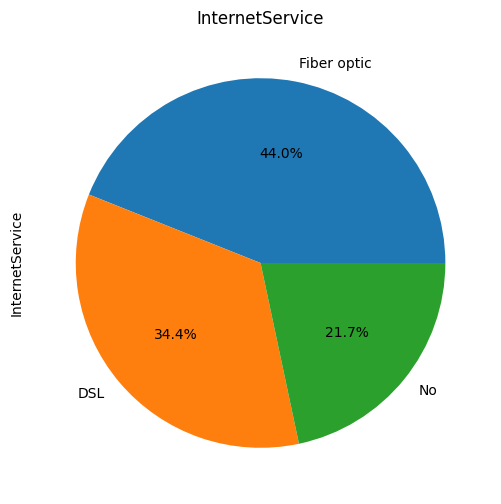

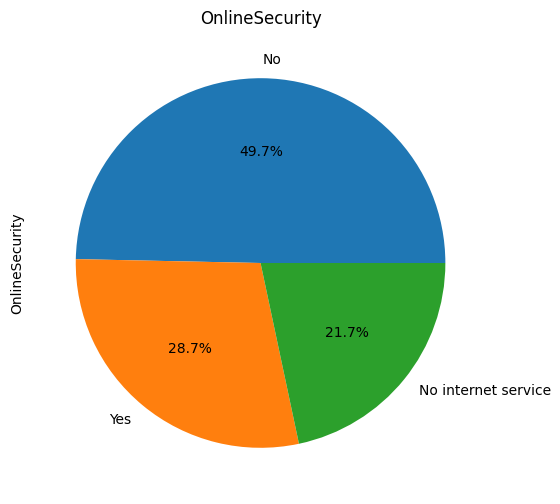

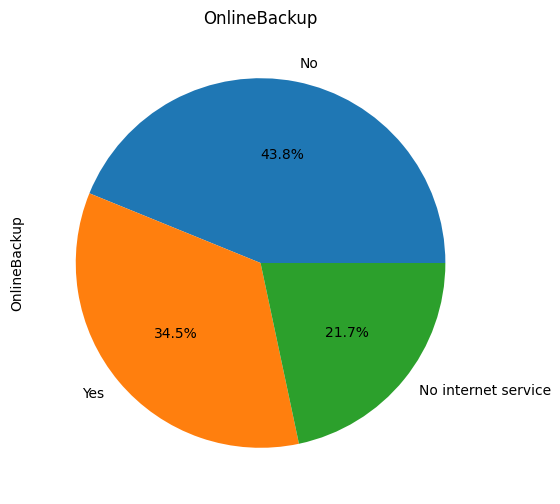

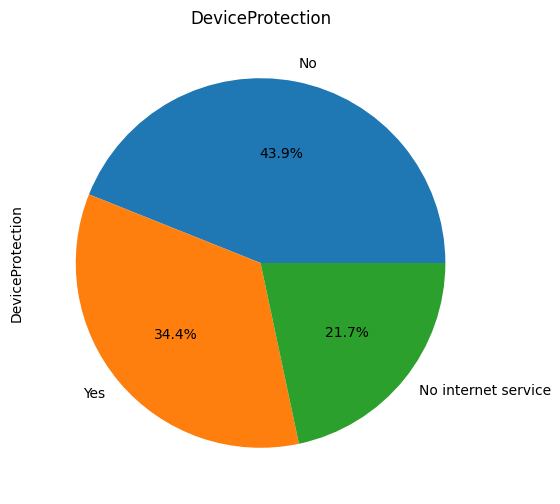

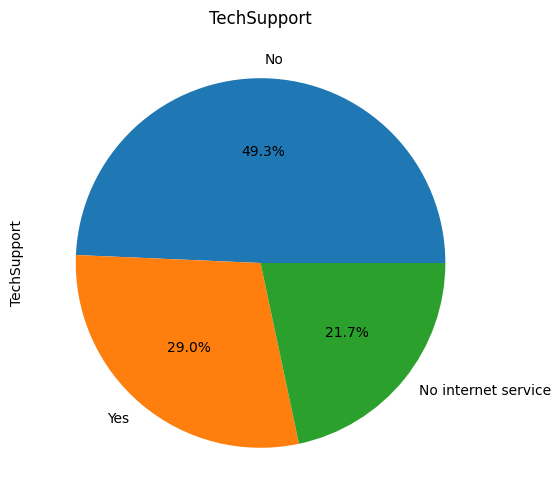

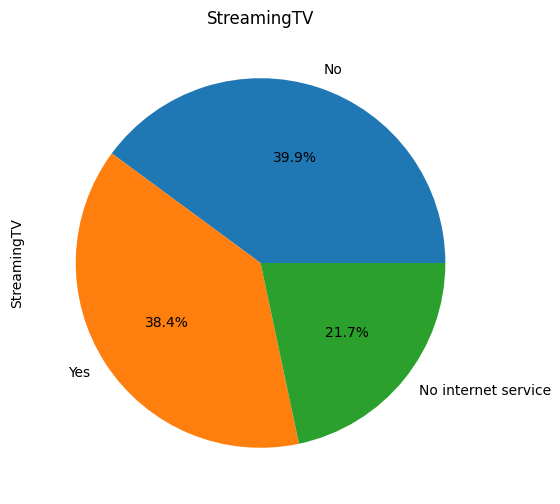

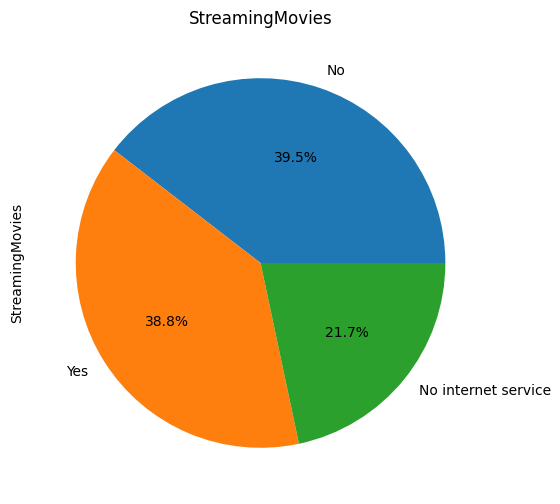

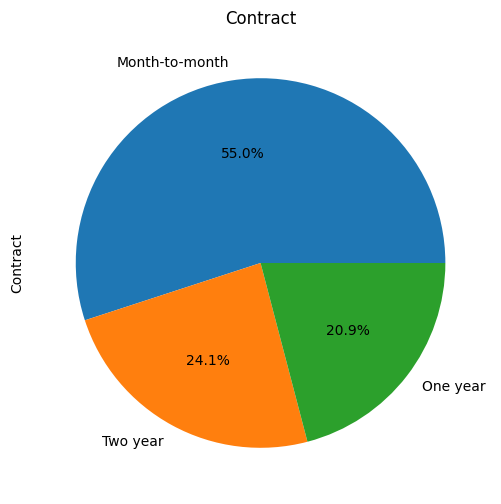

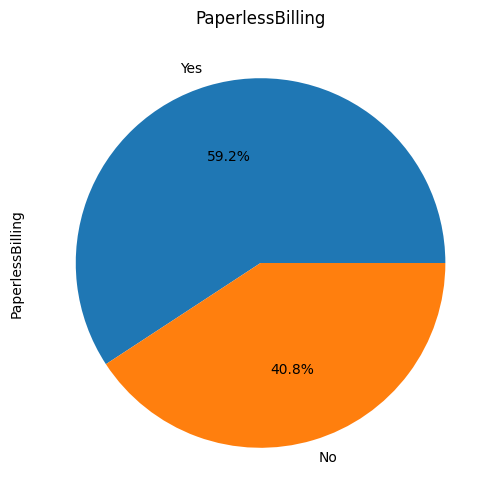

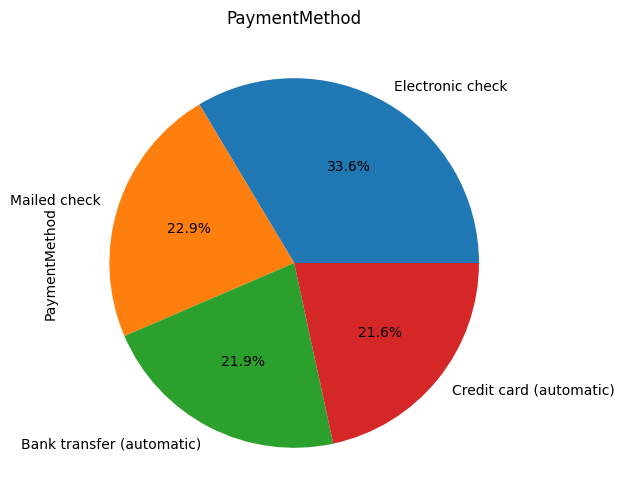

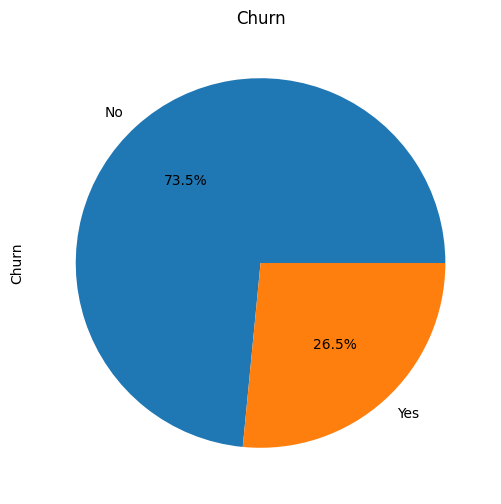

In [ ]:
create_piecharts(merged_df);

**Insights From** Pie Chart - 



1. Majority of customers did not churn (73.5%), and the gender distribution is almost equal with slightly more male customers (50.5%).
2. Majority of customers have dependents (70%), and almost all have phone service (90.3%)
3. For internet service, the most popular options are fiber optics (44.0%) and DSL (34.4%), while 21.7% of customers do not have internet service. Among the customers who have internet service, a significant portion do not have online security (49.7%) and online backup (43.8%)
4. When it comes to contracts, a majority of customers prefer a month-to-month contract (55.0%). Over half of the customers prefer paperless billing (59.2%), and electronic check is the most common payment method (33.6%).

 Churn - No - 73.5 & Yes 26.5
 Gender - Male : 50.5 & Female:49.5
 Partner - Yes: 51.7 & No: 48.3
 Dependetns - Yes: 70 & No: 30
 PhoneService - Yes: 90.3 & No: 9.7
 MultipleLine - Yes: 42.2 & No: 48.1 & No Phone Servise: 9.7
 Internet Service - DSL: 34.4 & Fiber Optics: 44.0 & No: 21.7
 OnlineSecurty - Yes: 28.7 & No: 49.7 & No Internet Service: 21.7
 OnlineBackup - Yes: 34.5 & No: 43.8 & No Internet Service: 21.7
 Device Protection - Yes: 34.4 & No: 43.9 & No Internet Service: 21.7
 Tech Support - Yes: 29.0 & No: 49.3 & No Internet Service: 21.7 
 Streaming Tv - Yes: 38.4 & No: 39.9 & No Internet Service: 21.7 
 Streaming Movies - Yes: 38.8 & No: 39.5 & No Internet Service: 21.7 
 Contract - Month to Month:55.0 & One Year: 20.9 & Two Year: 24.1
 Paperless Billing - Yes: 59.2 & No: 40.8
 Payement Method - Electronic Check: 33.6 Credit Card:21.6 Bank Transfer: 21.9 Mailed Check:22.9



In [ ]:
print(merged_df.StreamingTV.value_counts())
print(merged_df.Dependents.value_counts())
print(merged_df.Partner.value_counts())
print(merged_df.TechSupport.value_counts())
print(merged_df.DeviceProtection.value_counts())
print(merged_df.MultipleLines.value_counts())
print(merged_df.OnlineSecurity.value_counts())
print(merged_df.Contract.value_counts())
print(merged_df.PaymentMethod.value_counts())
print(merged_df.StreamingMovies.value_counts())
print(merged_df.OnlineBackup.value_counts())
print(merged_df.InternetService.value_counts())
print(merged_df.PhoneService.value_counts())
print(merged_df.PaperlessBilling.value_counts())
print(merged_df.gender.value_counts())
print(merged_df.SeniorCitizen.value_counts()) 

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64
No     4933
Yes    2110
Name: Dependents, dtype: int64
No     3641
Yes    3402
Name: Partner, dtype: int64
No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64
No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64
Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64
No                     2785
Yes             

In [ ]:
replaceStruct = {
                "StreamingTV":     {"No internet service": 1, "No": 2 ,"Yes": 3 },
                "TechSupport": {"No internet service": 1, "No": 2,"Yes": 3},
                 "DeviceProtection": {"No internet service": 1, "No": 2 ,"Yes": 3},
                 "OnlineSecurity": {"No internet service": 1, "No": 2 ,"Yes": 3},
                 "StreamingMovies": {"No internet service": 1, "No": 2 ,"Yes": 3},
                 "OnlineBackup": {"No internet service": 1, "No": 2 ,"Yes": 3},
                 "MultipleLines": {"No phone service": 1, "No": 2 ,"Yes": 3},
                 "InternetService": {"No": 1, "DSL": 2 ,"Fiber optic": 3},
                 "Dependents": {"No": 0, "Yes": 1 },
                 "Partner": {"No": 0, "Yes": 1 },
                 "PhoneService": {"No": 0, "Yes": 1 },
                 "PaperlessBilling": {"No": 0, "Yes": 1 },
                "Churn":     {"No": 0, "Yes": 1 } 
                    }
oneHotCols=["Contract","PaymentMethod","gender"]


In [ ]:
# Encode all the appropriate Categorical features with the best suitable approach
merged_df=merged_df.replace(replaceStruct)

merged_df = merged_df.drop(columns=['customerID'])
merged_df=pd.get_dummies(merged_df, columns=oneHotCols)

print("df after Categorical features conversion is  ")
merged_df.head(10)

df after Categorical features conversion is  


,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,Churn,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Female,gender_Male
0,0,1,0,1,0,1,2,2,3,2,...,0,1,0,0,0,0,1,0,1,0
1,0,0,0,34,1,2,2,3,2,3,...,0,0,1,0,0,0,0,1,0,1
2,0,0,0,2,1,2,2,3,3,2,...,1,1,0,0,0,0,0,1,0,1
3,0,0,0,45,0,1,2,3,2,3,...,0,0,1,0,1,0,0,0,0,1
4,0,0,0,2,1,2,3,2,2,2,...,1,1,0,0,0,0,1,0,1,0
5,0,0,0,8,1,3,3,2,2,3,...,1,1,0,0,0,0,1,0,1,0
6,0,0,1,22,1,3,3,2,3,2,...,0,1,0,0,0,1,0,0,0,1
7,0,0,0,10,0,1,2,3,2,2,...,0,1,0,0,0,0,0,1,1,0
8,0,1,0,28,1,3,3,2,2,3,...,1,1,0,0,0,0,1,0,1,0
9,0,0,1,62,1,2,2,3,3,2,...,0,0,1,0,1,0,0,0,0,1


In [ ]:
X = merged_df.drop("Churn" , axis=1)
Y = merged_df.pop("Churn")

In [ ]:
# 2.F split the data into train and test sets with an 80:20 proportion
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=10)

In [ ]:
# Standardize data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
model = xgb.XGBClassifier()

model.fit(X_train_scaled, Y_train)

accuracy = model.score(X_train_scaled, Y_train)
print("Accuracy on standardized train set:", accuracy)


# Evaluate model performance on standardized test set
accuracy = model.score(X_test_scaled, Y_test)
print("Accuracy on standardized test set:", accuracy)


Accuracy on standardized train set: 0.932729854455094
Accuracy on standardized test set: 0.7885024840312278


In [ ]:
xgb_model_v1 = XGBClassifier()

# Define the hyperparameter grid to search
parameters = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 500, 1000],
    'subsample': [0.5, 0.7, 1.0],
    'colsample_bytree': [0.5, 0.7, 1.0],
    'gamma': [0, 0.1, 0.2]
}

# Use GridSearchCV to find the best hyperparameters
grid_v1 = GridSearchCV(xgb_model_v1, param_grid=parameters, cv=5, scoring='accuracy', n_jobs=-1)
grid_v1.fit(X_train_scaled, Y_train)


# Print the best hyperparameters
print("Best hyperparameters: ", grid_v1.best_params_)
print("Best score:", grid_v1.best_score_)


In [ ]:
# Train the model with the best hyperparameters
best_model = XGBClassifier(**grid_v1.best_params_)
best_model.fit(X_train_scaled, Y_train)


In [ ]:
xgb_model1 = XGBClassifier()

# Define the hyperparameter grid to search
parameters = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 500, 1000],
    'subsample': [0.5, 0.7, 1.0],
    'colsample_bytree': [0.5, 0.7, 1.0],
    'gamma': [0, 0.1, 0.2]
}

# Use GridSearchCV to find the best hyperparameters
grid1 = GridSearchCV(xgb_model1, param_grid=parameters, cv=5, scoring='accuracy', n_jobs=-1)
grid1.fit(X_train_scaled, Y_train)


# Print the best hyperparameters
print("Best hyperparameters: ", grid1.best_params_)
print("Best score:", grid1.best_score_)


# Train the model with the best hyperparameters
best_model = XGBClassifier(**grid1.best_params_)
best_model.fit(X_train_scaled, Y_train)



Best hyperparameters:  {'colsample_bytree': 0.7, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500, 'subsample': 0.5}
Best score: 0.807598096772109


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=500, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
xgb_model = XGBClassifier()

# Define the hyperparameter grid to search
parameters = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 500, 1000],
    'subsample': [0.5, 0.7, 1.0],
    'colsample_bytree': [0.5, 0.7, 1.0],
    'gamma': [0, 0.1, 0.2]
}

# Use GridSearchCV to find the best hyperparameters
grid = GridSearchCV(xgb_model, param_grid=parameters, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(X_train_scaled, Y_train)


# Print the best hyperparameters
print("Best hyperparameters: ", grid.best_params_)
print("Best score:", grid.best_score_)


# Train the model with the best hyperparameters
best_model = XGBClassifier(**grid.best_params_)
best_model.fit(X_train_scaled, Y_train)



Best hyperparameters:  {'colsample_bytree': 0.7, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500, 'subsample': 0.5}
Best score: 0.807598096772109


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=500, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
y_train_pred = best_model.predict(X_train_scaled)
y_test_pred = best_model.predict(X_test_scaled)

# Evaluate the performance of the model
train_acc = accuracy_score(Y_train, y_train_pred)

print("Train accuracy:", train_acc)

test_acc = accuracy_score(Y_test, y_test_pred)
print("Test accuracy:", test_acc)

Train accuracy: 0.8136315228966986
Test accuracy: 0.8090844570617459


**Observation** - after using BestFit model 
- Accuracy increase on test 0.809 compare to 0.788

**Observation** - 
*   colsample_bytree: 0.7
*   gamma : 0
*   learning_rate : 0.01
*   max_depth : 3
*   n_estimators : 500
*   subsample : 0.5

**Best score:** 0.807598096772109

# PART B

**CONTEXT:**  The purpose is to build a machine learning workflow that will work autonomously irrespective of Data and users can save efforts
involved in building workflows for each dataset.

**PROJECT OBJECTIVE:** Build a machine learning workflow that will run autonomously with the csv file and return best performing model .

In [ ]:
def load_data(file_path):
    """
    Load data from csv file.
    """
    try:
        df = pd.read_csv(file_path)
        return df
    except Exception as e:
        print(f"Error loading data: {str(e)}")
        return None

In [ ]:
def check_for_special_chars(df):
    """
    Function to check for special characters in a DataFrame and return a list of column names containing
    blank, null, empty, or special characters like "?"
    """
    cols_with_special_chars = []
    for col in df.columns:
        if df[col].dtype == object:
            if df[col].apply(lambda x: True if isinstance(x, str) and (x is None or x.strip() == '') else False).any():
                cols_with_special_chars.append(col)
        elif df[col].isnull().sum() > 0:
            cols_with_special_chars.append(col)
    return cols_with_special_chars


In [ ]:
def fill_missing_values(df, special_cols):
    """
    Function to fill missing values (null or special characters) with the mean value of the column (if numeric).
    """
    # Fill missing values with the mean value of the column (if numeric)
    for col in special_cols:
      df[col] = pd.to_numeric(df[col], errors='coerce')
      df[df[col].isna()]

    for col in special_cols:
      # calculate the mean of the TotalCharges column
      mean_total_charges = df[col].mean()
      
      # replace NaN values with the mean value
      df[col] = df[col].fillna(mean_total_charges)
      #print("Data Type = \n", merged_df.info())    
    return df


In [ ]:
def drop_Columns(df, drop_cols):
    """
    drop unnecessary columns.
    """
    try:
        df = df.drop(drop_cols, axis=1)
        return df
    except Exception as e:
        print(f"Error performing drop column: {str(e)}")
        return None


In [ ]:
def convert_to_category(df):
  """
  Object column to categorical conversion
  """

  for feature in df.columns: # Loop through all columns in the dataframe
    if df[feature].dtype == 'object': # Only apply for columns with categorical strings
        df[feature] = pd.Categorical(df[feature])# Replace strings with an integer

  return df

In [ ]:
def split_data(df, test_size=0.2, random_state=42):
    """
    Split data into X and y and then into training and test sets.
    """
    X = df.iloc[:, :-1].values
    y = df.iloc[:, -1].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    return X_train, X_test, y_train, y_test

In [ ]:
def normalize_data(X_train, X_test):
    """
    Normalize X data using StandardScaler.
    """
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    return X_train, X_test


In [ ]:
def replacevalue(df, replaceStruct):
    """
    Replace values in df based on replace value stuct.
    """    
    # Encode all the appropriate Categorical features with the best suitable approach
    df=df.replace(replaceStruct)

    return df

In [ ]:
def preprocess_data(file_path, r_struct, oneHotCols, dropCols):
    """
    Load data, remove null values, perform feature engineering, and normalize the data.
    """
    try:
        # Load data
        df = load_data(file_path)
        if df is None:
            return None
                
        # Remove null values
        cols_with_special_chars = check_for_special_chars(df)        
        df = fill_missing_values(df, cols_with_special_chars)

        df = drop_Columns(df, dropCols)
        if df is None:
            return None

        df = replacevalue(df, r_struct)

        df = pd.get_dummies(df, columns=oneHotCols)

        df = convert_to_category(df)
        
        return df
    except Exception as e:
        print(f"Error preprocessing data: {str(e)}")
        return None

In [ ]:
def train_model(X_train, y_train, model_type):
    """
    Train a machine learning model and return the trained model.
    """
    try:
        if model_type == 'logistic':
            model = LogisticRegression(random_state=10)
        elif model_type == 'decision_tree':
            model = DecisionTreeClassifier(random_state=10)
        elif model_type == 'random_forest':
            model = RandomForestClassifier(random_state=10)
        else:
            raise ValueError('Invalid model type')

        model.fit(X_train, y_train)
        return model
    except Exception as e:
        print(f"Error train model data: {str(e)}")
        return None

In [ ]:
def evaluate_model(model, X_test, y_test):
    """
    Evaluate a trained model on the test set and print the results.
    """
    y_pred = model.predict(X_test)

    print('Accuracy metrics on test Data :', round(accuracy_score(y_test, y_pred),2))
    print('Precision metrics on test Data :', round(precision_score(y_test, y_pred),2) )
    print('Recall metrics on test Data :', round(recall_score(y_test, y_pred),2) )
    print('F1-score metrics on test Data:', round(f1_score(y_test, y_pred),2))
    print('Confusion matrix on test Data :\n ', confusion_matrix(y_test, y_pred))

In [ ]:
def save_model(model, model_file_path):
    """
    Save a trained model as a pickle file.
    """
    with open(model_file_path, 'wb') as f:
        pickle.dump(model, f)    

In [ ]:
def main(file_path, model_type, model_file_path, r_struct, oneHotCols, dropCols):
    """
    Main function that loads data, preprocesses it, trains a machine learning model, evaluates the model, and saves it as a pickle file.
    """
    # load and pre processing of data 
    df = preprocess_data(file_path, r_struct, oneHotCols, dropCols)
    if df is None:
        return None

    # split data
    X_train, X_test, y_train, y_test = split_data(df)

    # Normalize data
    X_train, X_test = normalize_data(X_train, X_test)

    # Train model
    model = train_model(X_train, y_train, model_type)
    if model is None:
        return "model Failed"

    # Evaluate model
    evaluate_model(model, X_test, y_test)

    # Save model
    save_model(model, model_file_path)

In [ ]:
file_path = '/content/drive/My Drive/AIML/Ensemble Techniques/Project/TelcomCustomer-Churn_2.csv'
model_type = 'random_forest'  # 'logistic', 'decision_tree
model_file_path = '/content/drive/My Drive/AIML/Ensemble Techniques/Project/'+model_type+'.pkl'

# based on data we need to build struct for conversion 
r_struct = {
                "StreamingTV":     {"No internet service": 1, "No": 2 ,"Yes": 3 },
                "TechSupport": {"No internet service": 1, "No": 2,"Yes": 3},
                 "DeviceProtection": {"No internet service": 1, "No": 2 ,"Yes": 3},
                 "OnlineSecurity": {"No internet service": 1, "No": 2 ,"Yes": 3},
                 "StreamingMovies": {"No internet service": 1, "No": 2 ,"Yes": 3},
                 "OnlineBackup": {"No internet service": 1, "No": 2 ,"Yes": 3},
                 "MultipleLines": {"No phone service": 1, "No": 2 ,"Yes": 3},
                 "InternetService": {"No": 1, "DSL": 2 ,"Fiber optic": 3},
                 "Dependents": {"No": 0, "Yes": 1 },
                 "Partner": {"No": 0, "Yes": 1 },
                 "PhoneService": {"No": 0, "Yes": 1 },
                 "PaperlessBilling": {"No": 0, "Yes": 1 },
                 "Churn":     {"No": 0, "Yes": 1 } 
          }

oneHotCols=["Contract","PaymentMethod"]
dropCols=["customerID"]

main(file_path, model_type, model_file_path, r_struct, oneHotCols, dropCols)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   OnlineBackup      7043 non-null   category
 1   DeviceProtection  7043 non-null   category
 2   TechSupport       7043 non-null   category
 3   StreamingTV       7043 non-null   category
 4   StreamingMovies   7043 non-null   category
 5   Contract          7043 non-null   category
 6   PaperlessBilling  7043 non-null   category
 7   PaymentMethod     7043 non-null   category
 8   MonthlyCharges    7043 non-null   float64 
 9   TotalCharges      7043 non-null   float64 
 10  Churn             7043 non-null   int64   
dtypes: category(8), float64(2), int64(1)
memory usage: 221.3 KB
Data Type = 
 None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------